# 🐟 Fishery Analytics Portfolio
This notebook contains data analysis using real-world-like fishery operations data. Insights include catch trends, auction price comparisons, vessel performance, and buyer spending.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
catch_logs = pd.read_csv('downloads/catch_logs.csv', parse_dates=['CatchDate'])
auction_prices = pd.read_csv('downloads/auction_prices.csv', parse_dates=['AuctionDate'])
market_prices = pd.read_csv('downloads/market_prices.csv', parse_dates=['MarketDate'])
vessels = pd.read_csv('downloads/vessels.csv')
buyers = pd.read_csv('downloads/buyers.csv')
vessel_perf = pd.read_csv('downloads/vessel_performance.csv')
fish_types = pd.read_csv('downloads/fish_types.csv')

## 📈 Monthly Catch Volume by Fish Type

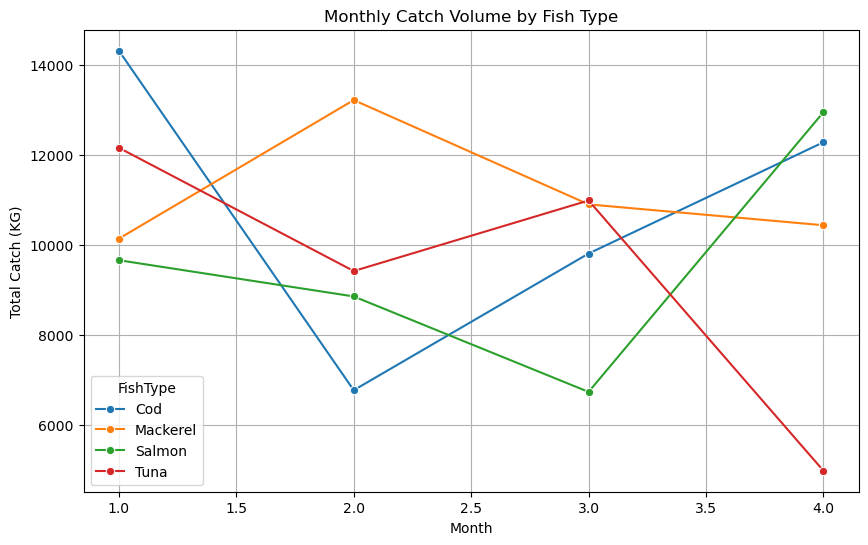

In [15]:
catch_logs['Month'] = catch_logs['CatchDate'].dt.month
monthly_catch = catch_logs.groupby(['Month', 'FishType'])['WeightKG'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_catch, x='Month', y='WeightKG', hue='FishType', marker='o')
plt.title('Monthly Catch Volume by Fish Type')
plt.ylabel('Total Catch (KG)')
plt.grid(True)
plt.show()

## 💰 Auction Price vs Market Price by Fish Type

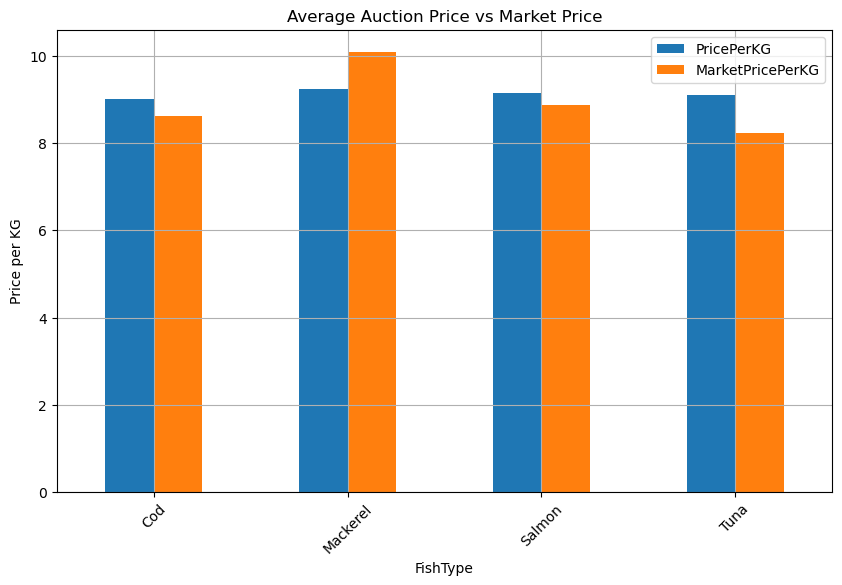

In [17]:
price_comparison = pd.merge(
    auction_prices,
    market_prices,
    how='inner',
    left_on=['AuctionDate', 'FishType'],
    right_on=['MarketDate', 'FishType']
)

price_summary = price_comparison.groupby('FishType')[['PricePerKG', 'MarketPricePerKG']].mean().reset_index()

price_summary.plot(x='FishType', kind='bar', figsize=(10,6))
plt.title('Average Auction Price vs Market Price')
plt.ylabel('Price per KG')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## ⚙️ Vessel Efficiency

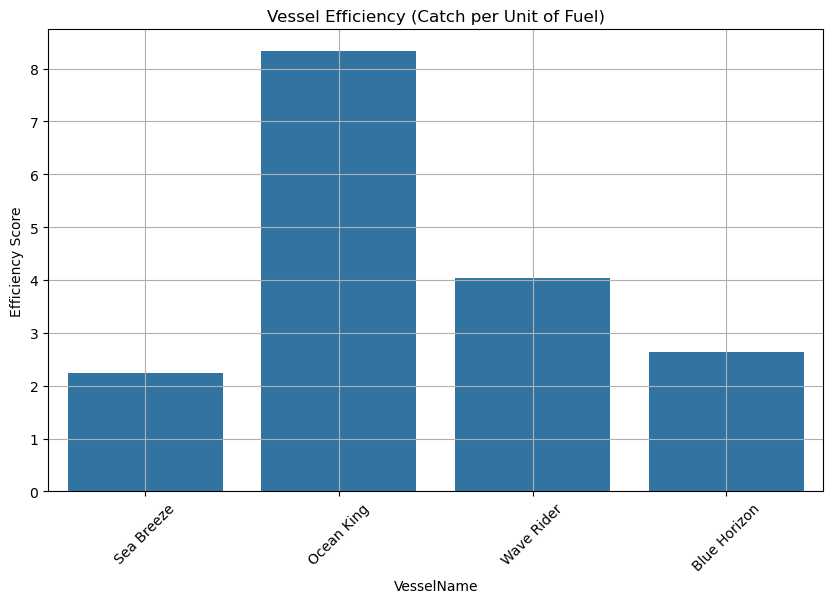

In [19]:
vessel_perf['Efficiency'] = (vessel_perf['CatchPerTrip'] * vessel_perf['TripsMade']) / vessel_perf['FuelUsed']
vessel_eff = pd.merge(vessel_perf, vessels, on='VesselID')

plt.figure(figsize=(10,6))
sns.barplot(data=vessel_eff, x='VesselName', y='Efficiency')
plt.title('Vessel Efficiency (Catch per Unit of Fuel)')
plt.ylabel('Efficiency Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 🧾 Top Buyers by Total Auction Spend

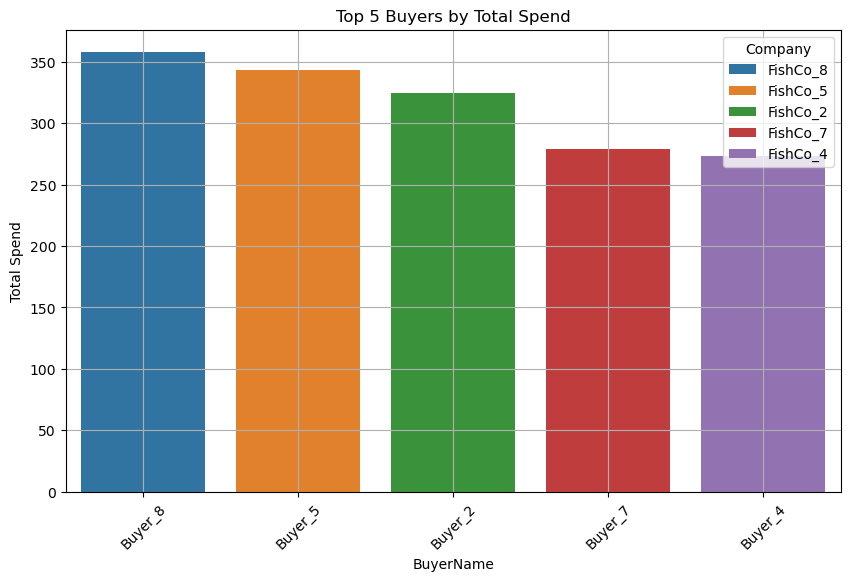

In [21]:
auction_prices['Spend'] = auction_prices['PricePerKG']  # Simulated spend
buyer_spend = auction_prices.groupby('BuyerID')['Spend'].sum().reset_index()
buyer_spend = pd.merge(buyer_spend, buyers, on='BuyerID').sort_values(by='Spend', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data=buyer_spend, x='BuyerName', y='Spend', hue='Company')
plt.title('Top 5 Buyers by Total Spend')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()